<a href="https://colab.research.google.com/github/PCR-git/Repo1/blob/master/Stats202A_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Networks with Pytorch

In [0]:
# Imports
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

In [2]:
# Use Data_loader to load_in MNIST data
train_data = datasets.MNIST('./', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=False)
cur_x, cur_y = next(iter(train_loader))
print(cur_x.size()) # x_train for current iteration
print(cur_y.size()) # y_train for current iteration

batch_size = 100
test_data = datasets.MNIST('./', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, shuffle=False)
test_x, test_y = next(iter(test_loader))
print(test_x.size()) # x_test for current iteration
print(test_y.size()) # y_test for current iteration

torch.Size([10, 1, 28, 28])
torch.Size([10])
torch.Size([100, 1, 28, 28])
torch.Size([100])


## Build a Simple Fully-Connected Net

In [0]:
# Network Structure:
# Fully Connected -> ReLu -> Fully Connected -> Softmax
class fc_net2(torch.nn.Module):
    def __init__(self, num_in, num_out):
        super(fc_net2, self).__init__()
        self.h1 = torch.nn.Linear(in_features=num_in, out_features=256)  # Fully-connected layer
        self.h2 = torch.nn.Linear(in_features=256, out_features=num_out) # Fully-connected layer
    
    def forward(self, inputs):
        a1 = F.relu(self.h1(inputs)) # ReLu activation
        a2 = F.softmax(self.h2(a1),dim=-1) # Softmax activation
        return a2

# Train the model:
def train(model,loss,train_loader,optimizer,epoch):
    model.train()
    print('Train Epoch: ', epoch)
    for batch_idx, (cur_x, cur_y) in enumerate(train_loader):
        cur_x = torch.reshape(cur_x, (10, 28*28))
        optimizer.zero_grad() # Zero out gradients
        output = model.forward(cur_x) # Propagate forward through network
        cur_loss = loss(output, cur_y) # Compute loss at current iteration
        cur_loss.backward() # Backprop
        optimizer.step() # Step of optimizer
        
        if batch_idx % 1000 == 0:
            print('    Iteration: ', batch_idx, ' Loss: ', round(cur_loss.item(),5))

# Test the model:
def test(model,loss,test_loader):
    model.eval()
    print('Test Set:')
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (cur_x, cur_y) in enumerate(test_loader):
            cur_x = torch.reshape(cur_x, (100, 28*28))
            output = model.forward(cur_x)
            test_loss = loss(output, cur_y)
            preds = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += preds.eq(cur_y.view_as(preds)).sum().item()
            acc = correct/len(test_loader.dataset)

        test_loss /= len(test_loader.dataset)
        print('    Average loss: ', format(test_loss.item(),"10.2E") , ' Accuracy: ', 100.*acc, '%')
    return(test_loss, acc)

In [4]:
# Run the model:
model = fc_net2(num_in=28*28, num_out=10)
loss = torch.nn.CrossEntropyLoss() # Cross entropy loss
# opt = torch.optim.SGD(model.parameters(), lr=0.1) # SGD
opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4) # SGD with momentum
# opt = torch.optim.Adam(model.parameters(), lr=0.1) # Adam

num_epochs = 5
loss_v = np.zeros(num_epochs)
acc_v = np.zeros(num_epochs)
for epoch in np.arange(num_epochs)+1:
    train(model,loss,train_loader,opt,epoch)
    [test_loss, acc] = test(model,loss,test_loader)
    loss_v[epoch-1] = test_loss
    acc_v[epoch-1] = acc

Train Epoch:  1
    Iteration:  0  Loss:  2.30686
    Iteration:  1000  Loss:  1.49006
    Iteration:  2000  Loss:  1.57654
    Iteration:  3000  Loss:  1.46264
    Iteration:  4000  Loss:  1.47919
    Iteration:  5000  Loss:  1.56
Test Set:
    Average loss:    1.56E-04  Accuracy:  93.41000000000001 %
Train Epoch:  2
    Iteration:  0  Loss:  1.46297
    Iteration:  1000  Loss:  1.53444
    Iteration:  2000  Loss:  1.48311
    Iteration:  3000  Loss:  1.46134
    Iteration:  4000  Loss:  1.46288
    Iteration:  5000  Loss:  1.50228
Test Set:
    Average loss:    1.53E-04  Accuracy:  95.07 %
Train Epoch:  3
    Iteration:  0  Loss:  1.46126
    Iteration:  1000  Loss:  1.49849
    Iteration:  2000  Loss:  1.53936
    Iteration:  3000  Loss:  1.46299
    Iteration:  4000  Loss:  1.46158
    Iteration:  5000  Loss:  1.48325
Test Set:
    Average loss:    1.51E-04  Accuracy:  95.89 %
Train Epoch:  4
    Iteration:  0  Loss:  1.46123
    Iteration:  1000  Loss:  1.49182
    Iteration:  200

In [0]:
import matplotlib.pyplot as plt

# Plot function:
def plot_la(num_epochs, loss, acc):
    epoch_v = np.linspace(1,num_epochs,num_epochs)

    ## Plot of the loss vs epoch:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (14,7))
    # fig, ax = plt.subplots(1, 1, figsize = (7,7))
    ax1.plot(epoch_v, loss, '-', color = "black")
    ax1.set_title('Loss per Epoch')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid()

    ## Plot of the accuracy vs epoch:
    ax2.plot(epoch_v, acc, '-', color = "black")
    ax2.set_title('Accuracy per Epoch')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    plt.show()

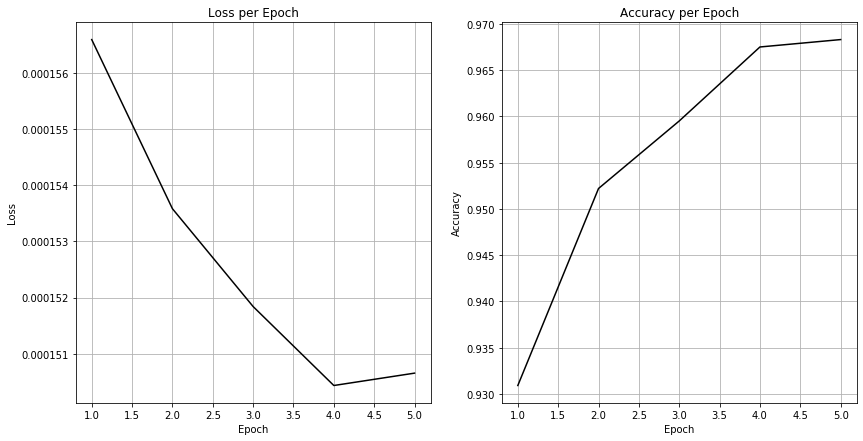

In [0]:
plot_la(num_epochs, loss_v, acc_v)

## Build a Convolutional Network

In [0]:
# Network Structure:
    # (2D Convolution -> ReLu -> Max Pool)*2 ->
    # Fully Connected -> ReLu -> Fully Connected -> Softmax
class ConvNet(torch.nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 4, 3)
        self.conv2 = torch.nn.Conv2d(4, 8, 3)
        self.drop1 = torch.nn.Dropout2d(0.25)
        self.drop2 = torch.nn.Dropout2d(0.35)
        self.fc1 = torch.nn.Linear(200, 128)
        self.fc2 = torch.nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
#         x = self.drop1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2,2))
#         x = self.drop2(x)
        num_features = np.prod(x.size()[1:])
        x = x.view(-1, num_features)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
#         x = F.softmax(x,dim=1)
        x = F.log_softmax(x, dim=1)
        return x

# Train the model
def train(model,loss,train_loader,optimizer,epoch):
    model.train()
    print('Train Epoch: ', epoch)
    for batch_idx, (cur_x, cur_y) in enumerate(train_loader):
        cur_x = torch.reshape(cur_x, (10,1,28,28))
        optimizer.zero_grad() # Zero out gradient
        output = model.forward(cur_x) # Propagate forward through network
        cur_loss = loss(output, cur_y) # Compute loss at current iteration
        cur_loss.backward() # Backprop
        optimizer.step() # Step of optimizer
        
        # Print:
        if batch_idx % 1000 == 0:
            print('    Iteration: ', batch_idx, ' Loss: ', round(cur_loss.item(),5))

# Test the network
def test(model,loss,test_loader):
    model.eval()
    print('Test Set:')
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (cur_x, cur_y) in enumerate(test_loader):
            cur_x = torch.reshape(cur_x, (100,1,28,28))
            output = model.forward(cur_x)
            test_loss = loss(output, cur_y)
            preds = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += preds.eq(cur_y.view_as(preds)).sum().item()
            acc = correct/len(test_loader.dataset)

        test_loss /= len(test_loader.dataset)
        print('    Average loss: ', format(test_loss.item(),"10.2E") , ' Accuracy: ', 100.*acc, '%')
    return(test_loss, acc)

In [0]:
# Run the model:
model = ConvNet()
loss = torch.nn.CrossEntropyLoss() # Cross entropy loss
opt = torch.optim.SGD(model.parameters(), lr=0.1) # SGD with momentum

num_epochs = 5
loss_v = np.zeros(num_epochs)
acc_v = np.zeros(num_epochs)
for epoch in np.arange(num_epochs)+1:
    train(model,loss,train_loader,opt,epoch)
    [test_loss, acc] = test(model,loss,test_loader)
    loss_v[epoch-1] = test_loss
    acc_v[epoch-1] = acc

Train Epoch:  1
    Iteration:  0  Loss:  2.31596
    Iteration:  1000  Loss:  0.0558
    Iteration:  2000  Loss:  0.24577
    Iteration:  3000  Loss:  0.00249
    Iteration:  4000  Loss:  0.01135
    Iteration:  5000  Loss:  0.00636
Test Set:
    Average loss:    4.72E-06  Accuracy:  97.84 %
Train Epoch:  2
    Iteration:  0  Loss:  0.00148
    Iteration:  1000  Loss:  0.02163
    Iteration:  2000  Loss:  0.00878
    Iteration:  3000  Loss:  0.00223
    Iteration:  4000  Loss:  0.01746
    Iteration:  5000  Loss:  0.00238
Test Set:
    Average loss:    4.76E-06  Accuracy:  98.03 %
Train Epoch:  3
    Iteration:  0  Loss:  0.00071
    Iteration:  1000  Loss:  0.00259
    Iteration:  2000  Loss:  0.05724
    Iteration:  3000  Loss:  0.00098
    Iteration:  4000  Loss:  0.00859
    Iteration:  5000  Loss:  0.00139
Test Set:
    Average loss:    2.32E-06  Accuracy:  97.94 %
Train Epoch:  4
    Iteration:  0  Loss:  0.00035
    Iteration:  1000  Loss:  0.00131
    Iteration:  2000  Loss:  

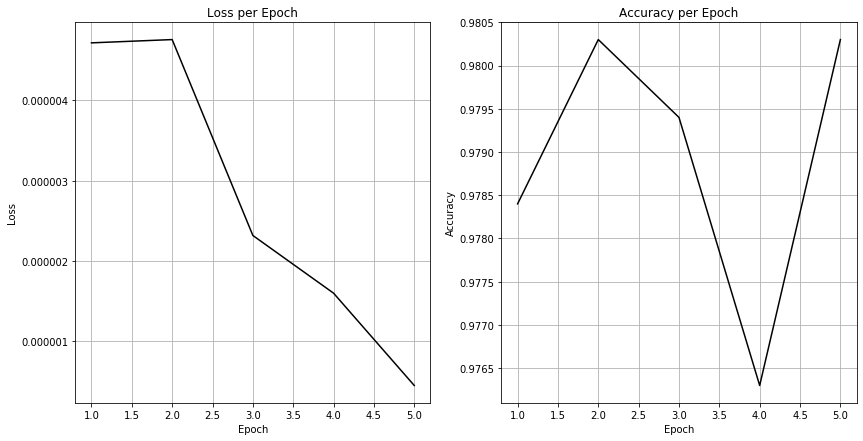

In [0]:
plot_la(num_epochs, loss_v, acc_v)